# Data cleansing notes on removed records:

## See data_engineering.ipynb for more details.

### Measurement Records Information
    19,550 total records before changes
    1,447 records with blank precipitation (col = "prcp")
    18,103 records with no known issues after removing 1,447 with blank prcp
    Percentage of records removed is 0.07%
    Percentage of records remaining is 93.0%


In [20]:
## Dependencies
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(sum(map(ord, "aesthetics")))
import datetime as dt
from datetime import datetime, date, time

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, and_
print(matplotlib.__version__)
print(matplotlib.get_backend())

2.0.2
nbAgg


In [2]:
# Create an engine for the hawaii.sqlite database
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [3]:
# Use the Inspector to explore the database
inspector = inspect(engine)
inspector.get_table_names()

['station', 'weather']

In [4]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('weather')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [5]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [6]:
# Reflect hawaii database table station into its ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
station = Base.classes.station

In [7]:
# Reflect hawaii database table weather into it's ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
weather = Base.classes.weather

In [8]:
# Start a session to query the database
session = Session(engine)

# Queries for Precipitation Analysis  Year 2014 All Stations                     

In [9]:
# Return count of prcp for all stations - period 2014-01-01 - 2014-12-31
s_prcp = session.query(weather.station, func.count(weather.prcp)).\
                       filter(weather.date.between('2014-01-01','2014-12-31')).\
                       group_by(weather.station).all()
s_prcp

[('USC00511918', 349),
 ('USC00513117', 359),
 ('USC00514830', 246),
 ('USC00516128', 311),
 ('USC00517948', 100),
 ('USC00518838', 7),
 ('USC00519281', 365),
 ('USC00519397', 356),
 ('USC00519523', 309)]

In [10]:
# Return sum of prcp per station - period 2014-01-01 - 2014-12-31
station_sum = session.query(weather.station, func.sum(weather.prcp)).\
    filter(weather.date.between('2014-01-01','2014-12-31')).\
    group_by(weather.station).all()
station_sum

[('USC00511918', 21.940000000000005),
 ('USC00513117', 58.410000000000025),
 ('USC00514830', 39.309999999999995),
 ('USC00516128', 144.5500000000001),
 ('USC00517948', 7.209999999999996),
 ('USC00518838', 0.51),
 ('USC00519281', 89.85000000000002),
 ('USC00519397', 21.190000000000005),
 ('USC00519523', 45.930000000000035)]

# Queries for Temperature Analysis  Jan 15th - 28th 2015 All Stations
                                     * My Vacation Period

In [11]:
# Min, Avg, Max tobs using all weather stations - period 2015-01-15 - 2015-01-28
tobs_mam = session.query(weather.date, func.min(weather.tobs),func.avg(weather.tobs),\
                         func.max(weather.tobs)).\
           filter(weather.date.between('2015-01-15','2015-01-28')).\
           group_by(weather.date).\
           order_by(weather.date.asc()).all()
tobs_mam

[('2015-01-15', 65.0, 71.28571428571429, 75.0),
 ('2015-01-16', 68.0, 70.57142857142857, 74.0),
 ('2015-01-17', 66.0, 70.28571428571429, 74.0),
 ('2015-01-18', 63.0, 67.83333333333333, 74.0),
 ('2015-01-19', 63.0, 67.5, 71.0),
 ('2015-01-20', 64.0, 67.85714285714286, 77.0),
 ('2015-01-21', 61.0, 65.0, 71.0),
 ('2015-01-22', 61.0, 66.0, 75.0),
 ('2015-01-23', 67.0, 72.28571428571429, 79.0),
 ('2015-01-24', 66.0, 68.57142857142857, 72.0),
 ('2015-01-25', 64.0, 66.5, 68.0),
 ('2015-01-26', 65.0, 68.16666666666667, 71.0),
 ('2015-01-27', 59.0, 67.8, 72.0),
 ('2015-01-28', 66.0, 68.2, 70.0)]

In [12]:
# put data into a data frame for charting
tobs_mam_df = pd.DataFrame(tobs_mam,columns=["date", "min_tobs", "avg_tobs", "max_tobs"]) 
print(len(tobs_mam_df.index))
tobs_mam_df.info()
tobs_mam_df

14
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
date        14 non-null object
min_tobs    14 non-null float64
avg_tobs    14 non-null float64
max_tobs    14 non-null float64
dtypes: float64(3), object(1)
memory usage: 528.0+ bytes


,date,min_tobs,avg_tobs,max_tobs
0,2015-01-15,65.0,71.285714,75.0
1,2015-01-16,68.0,70.571429,74.0
2,2015-01-17,66.0,70.285714,74.0
3,2015-01-18,63.0,67.833333,74.0
4,2015-01-19,63.0,67.500000,71.0
5,2015-01-20,64.0,67.857143,77.0
6,2015-01-21,61.0,65.000000,71.0
7,2015-01-22,61.0,66.000000,75.0
8,2015-01-23,67.0,72.285714,79.0
9,2015-01-24,66.0,68.571429,72.0


In [13]:
# Convert the string to a datetime object
tobs_mam_df["date"] = pd.to_datetime(tobs_mam_df["date"], format='%Y-%m-%d')
tobs_mam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
date        14 non-null datetime64[ns]
min_tobs    14 non-null float64
avg_tobs    14 non-null float64
max_tobs    14 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 528.0 bytes


In [14]:
# Convert the string to a datetime object
tobs_mam_df["mth-day"] = tobs_mam_df["date"].dt.strftime('%b-%d')
tobs_mam_df.head()

,date,min_tobs,avg_tobs,max_tobs,mth-day
0,2015-01-15,65.0,71.285714,75.0,Jan-15
1,2015-01-16,68.0,70.571429,74.0,Jan-16
2,2015-01-17,66.0,70.285714,74.0,Jan-17
3,2015-01-18,63.0,67.833333,74.0,Jan-18
4,2015-01-19,63.0,67.500000,71.0,Jan-19


In [15]:
mth_day_mam_df = tobs_mam_df[["mth-day","min_tobs","avg_tobs", "max_tobs"]]
mth_day_mam_df

,mth-day,min_tobs,avg_tobs,max_tobs
0,Jan-15,65.0,71.285714,75.0
1,Jan-16,68.0,70.571429,74.0
2,Jan-17,66.0,70.285714,74.0
3,Jan-18,63.0,67.833333,74.0
4,Jan-19,63.0,67.500000,71.0
5,Jan-20,64.0,67.857143,77.0
6,Jan-21,61.0,65.000000,71.0
7,Jan-22,61.0,66.000000,75.0
8,Jan-23,67.0,72.285714,79.0
9,Jan-24,66.0,68.571429,72.0


In [16]:
# Set the index to the date column for pandas df.plot()
mth_day_mam_df = mth_day_mam_df.set_index('mth-day')
print(len(mth_day_mam_df.index))
mth_day_mam_df.info()
mth_day_mam_df

14
<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, Jan-15 to Jan-28
Data columns (total 3 columns):
min_tobs    14 non-null float64
avg_tobs    14 non-null float64
max_tobs    14 non-null float64
dtypes: float64(3)
memory usage: 448.0+ bytes


,min_tobs,avg_tobs,max_tobs
mth-day,,,
Jan-15,65.0,71.285714,75.0
Jan-16,68.0,70.571429,74.0
Jan-17,66.0,70.285714,74.0
Jan-18,63.0,67.833333,74.0
Jan-19,63.0,67.500000,71.0
Jan-20,64.0,67.857143,77.0
Jan-21,61.0,65.000000,71.0
Jan-22,61.0,66.000000,75.0
Jan-23,67.0,72.285714,79.0


<IPython.core.display.Javascript object>


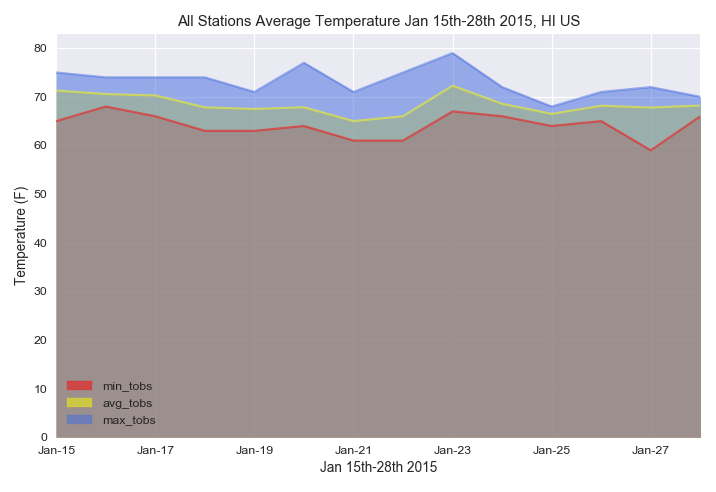

In [17]:
# Pandas DataFrame.plot(kind='area')

my_colors = ['red', 'yellow', "royalblue"]

ax = mth_day_mam_df.plot(kind='area',color=my_colors, stacked=False,
                 title="All Stations Average Temperature Jan 15th-28th 2015, HI US")
ax.set_xlabel("Jan 15th-28th 2015")
ax.set_ylabel("Temperature (F)")

plt.tight_layout()
plt.savefig("tmin_tavg_tmax_jan_15-28-2015.png")
plt.show()